In [295]:
import pandas as pd
import re
from io import StringIO
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
#fonction de récupération des matrices des fichiers .md
def get_sections(s):
    for sec in s.split('##'):
        yield sec if sec.startswith('##') else '##'+sec

In [313]:
with open('modeles/lemma.tar-scoreGeneral.md', 'r') as f:
    texteL = f.read()
    print(texteL)
with open('modeles/lemma.tar-scoreTidy.md', 'r') as f:
    texteLT = f.read()
    print(texteLT)


## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8767   | 0.4699    | 0.4689 | 35888   |
| known-tokens     | 0.8767   | 0.4699    | 0.4689 | 35888   |
| ambiguous-tokens | 0.9012   | 0.5016    | 0.5425 | 11639   |
| unknown-targets  | 0.0398   | 0.0231    | 0.0204 | 1206    |


### lemma Classification report

| target            | precision | recall | f1-score | support |
|-------------------|-----------|--------|----------|---------|
| !                 | 1.00      | 0.98   | 0.99     | 85      |
| '                 | 0.06      | 1.00   | 0.12     | 5       |
| )                 | 0.00      | 0.00   | 0.00     | 0       |
| *                 | 0.00      | 0.00   | 0.00     | 0       |
| ,                 | 1.00      | 1.00   | 1.00     | 2300    |
| -                 | 0.30      | 1.00   | 0.46     | 67      |
| .                 | 1.00      | 0.44   | 0.61     | 1380    |


In [348]:
with open('modeles/POS.tar-scoreGeneral.md', 'r') as f:
    texteP = f.read()
    print(texteP)
with open('modeles/POS.tar-scoreTidy.md', 'r') as f:
    textePT = f.read()
    print(textePT)


## POS

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.8897   | 0.6933    | 0.6837 | 35888   |
| known-tokens     | 0.8897   | 0.6933    | 0.6837 | 35888   |
| ambiguous-tokens | 0.9255   | 0.7087    | 0.6892 | 16029   |


### POS Classification report

| target        | precision | recall | f1-score | support |
|---------------|-----------|--------|----------|---------|
| ABR           | 0.00      | 0.00   | 0.00     | 1       |
| ADJcar        | 0.57      | 0.42   | 0.48     | 19      |
| ADJind        | 0.78      | 0.74   | 0.76     | 61      |
| ADJint        | 0.00      | 0.00   | 0.00     | 1       |
| ADJord        | 0.89      | 0.74   | 0.81     | 23      |
| ADJpos        | 0.49      | 0.67   | 0.56     | 27      |
| ADJqua        | 0.88      | 0.80   | 0.84     | 1132    |
| ADVgen        | 0.91      | 0.92   | 0.92     | 2175    |
| ADVgen.PROper | 0.80      | 1.00   | 0.89

In [349]:
#on n'a pas fait de fonctions, donc modifier ici
dfScorePT = pd.DataFrame(columns=['accuracy', 'precision', 'recall','support'])
dfClassificationPT = pd.DataFrame(columns=['precision', 'recall','f1-score','support'])
dfConfusionPT = pd.DataFrame(columns=['TotalErrors', 'Predictions', 'Predictedtimes'])
for i,sec in enumerate(get_sections(textePT)):
    if i == 0:
        pass
    else:
        sec2 = re.sub('##.*', '', sec)
        currentVal = re.search('###?\s*(.*)\n', sec).group(1)
        print(currentVal)
        if re.search('Classification report', currentVal):
            dfClass = pd.read_csv(StringIO(sec2.replace(' ', '')), sep='|',index_col=1).dropna(axis=1,how='all').iloc[1:]
            dfClassificationPT = dfClassificationPT.append(dfClass) 
        elif re.search('Confusion Matrix', currentVal):
            dfConf= pd.read_csv(StringIO(sec2.replace(' ', '')), sep='|',index_col=1).dropna(axis=1,how='all').iloc[1:]
            dfConfusionPT = dfConfusionPT.append(dfConf)
        else:
            df = pd.read_csv(StringIO(sec2.replace(' ', '')), sep='|',index_col=1).dropna(axis=1,how='all').iloc[1:]
            dfScorePT = dfScorePT.append(df)
    #print(dfScore)
    #return dfScore
    #return dfConfusion

POS
POS Classification report
POS Confusion Matrix


In [287]:
#dfClass = dfClassificationP.sort_values(['precision'], ascending=[True])
#dfC[(dfC["support"] > 0) & (dfC["precision"] == 0)]
#print(dfClass)
dfConfusionL

,TotalErrors,Predictions,Predictedtimes
.,768,OUT,653
NaN,NaN,-,72
NaN,NaN,1,10
NaN,NaN,le,6
NaN,NaN,),6
...,...,...,...
Berry,1,Berri,1
Bourgogne,1,Borgogne,1
descroissement2,1,descroissement,1
empeindre1,1,empec,1


In [305]:
dfConfu = dfConfusionL.fillna(method='ffill')
dfConfu.index = pd.Series(dfConfu.index).fillna(method='ffill')
dfConfu

,TotalErrors,Predictions,Predictedtimes
.,768,OUT,653
.,768,-,72
.,768,1,10
.,768,le,6
.,768,),6
...,...,...,...
Berry,1,Berri,1
Bourgogne,1,Borgogne,1
descroissement2,1,descroissement,1
empeindre1,1,empec,1


In [311]:
dfConfu['TotalErrors'] = dfConfu['TotalErrors'].astype(float) 

array([[<AxesSubplot:title={'center':'TotalErrors'}>]], dtype=object)

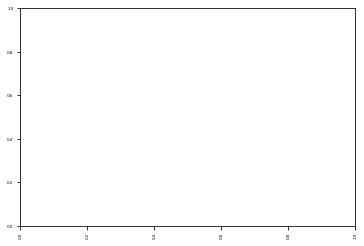

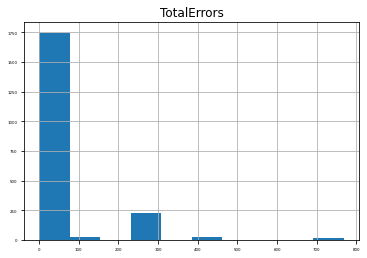

In [312]:
plt.xticks(rotation=90)

dfConfu.hist(column='TotalErrors')
#plt.show()

#plt.rc('xtick', labelsize=4) 
#plt.rc('ytick', labelsize=4) 
#plt.xlabel('Nombre de fois')
#plt.ylabel('Prédictions')
#plt.savefig('visualisations/scatterplots/confusion.png', dpi=300, transparent=False,bbox_inches='tight') 

In [ ]:
###fin des tests

In [352]:
dfPT = dfClassificationPT[dfClassificationPT.columns].astype(float) 
#dfLT = dfClassificationL[dfClassificationL.columns].astype(float) 


In [339]:
###on va enlever les signes de pc et les NP : on sélectionne la partie du df  qui contient les lemmes propres
dfLT= dfLT.loc['a2':'öir',]
dfLT = dfLT[(dfLT["support"] > 0)]

In [340]:
###tri pour pas avoir trop de données
###faire deux graphiques différents : inf à 0.9 et sup à 0.9 
#dfL = dfL[(dfL["support"] > 10) & (dfL["precision"] < 0.9)]
###pour les plus faibles, pas égal à 0 et supérieurs à 1 
### pour les plus forts, sup 0.96 et sup 20
dfLT = dfLT[(dfLT["precision"] > 0.5) & (dfLT["precision"] < 0.8) & (dfLT["support"] > 2)]
dfLT

,precision,recall,f1-score,support
acoillir,0.67,0.67,0.67,3.0
aleine,0.67,0.67,0.67,3.0
apercevoir,0.75,1.00,0.86,3.0
assalir,0.60,0.75,0.67,4.0
asseoir,0.70,1.00,0.82,7.0
...,...,...,...,...
vassal,0.75,1.00,0.86,9.0
vers1,0.67,0.67,0.67,3.0
vil1,0.75,0.60,0.67,5.0
vivre1,0.73,0.67,0.70,12.0


In [341]:
s=dfLT.stack()
s.name='val'
df_tidy= s.reset_index()
df_tidy

,level_0,level_1,val
0,acoillir,precision,0.67
1,acoillir,recall,0.67
2,acoillir,f1-score,0.67
3,acoillir,support,3.00
4,aleine,precision,0.67
...,...,...,...
355,vivre1,support,12.00
356,voler,precision,0.57
357,voler,recall,0.67
358,voler,f1-score,0.62


In [342]:
df_tidy = df_tidy[(df_tidy["level_1"] != 'support') & (df_tidy["level_0"] != "«") & (df_tidy["level_0"] != "»")]
df_tidy

,level_0,level_1,val
0,acoillir,precision,0.67
1,acoillir,recall,0.67
2,acoillir,f1-score,0.67
4,aleine,precision,0.67
5,aleine,recall,0.67
...,...,...,...
353,vivre1,recall,0.67
354,vivre1,f1-score,0.70
356,voler,precision,0.57
357,voler,recall,0.67


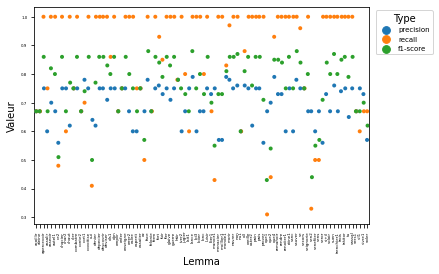

In [343]:
plt.xticks(rotation=90)
gfg = sns.stripplot(data = df_tidy, x="level_0", y="val", hue="level_1", jitter=True, size=4)

gfg.legend(fontsize=7,bbox_to_anchor= (1.2,1),title="Type")

plt.rc('xtick', labelsize=4) 
plt.rc('ytick', labelsize=4) 

plt.xlabel('Lemma')
plt.ylabel('Valeur')
plt.savefig('visualisations/scatterplots/tidy/LemmaClassificationMoyenneTidy.png', dpi=300, transparent=False,bbox_inches='tight') 

In [353]:
### pour POS
dfPT = dfPT.loc[:'VERppe']
dfPT = dfPT[(dfPT["support"] > 0)]
dfPT

,precision,recall,f1-score,support
ABR,0.00,0.00,0.00,7.0
ADJcar,0.47,0.56,0.51,133.0
ADJind,0.80,0.77,0.78,406.0
ADJint,0.00,0.00,0.00,7.0
ADJord,0.72,0.78,0.75,161.0
ADJpos,0.56,0.66,0.61,189.0
ADJqua,0.85,0.79,0.82,7826.0
ADVgen,0.92,0.90,0.91,15099.0
ADVgen.PROper,0.87,0.95,0.91,56.0
ADVint,0.71,0.49,0.58,70.0


In [354]:
## prépa des données pour ploter valeur par fréquence
dfMat = dfPT.pivot_table(
    values=['precision','f1-score','recall'],
    index=[dfPT.index, 'support']
    )

In [355]:
s1 =dfMat.stack()
s1.name='val'
df_tidyM= s1.reset_index()
df_tidyM

,level_0,support,level_2,val
0,ABR,7.0,f1-score,0.00
1,ABR,7.0,precision,0.00
2,ABR,7.0,recall,0.00
3,ADJcar,133.0,f1-score,0.51
4,ADJcar,133.0,precision,0.47
...,...,...,...,...
136,VERppa,476.0,precision,0.76
137,VERppa,476.0,recall,0.71
138,VERppe,6832.0,f1-score,0.87
139,VERppe,6832.0,precision,0.82


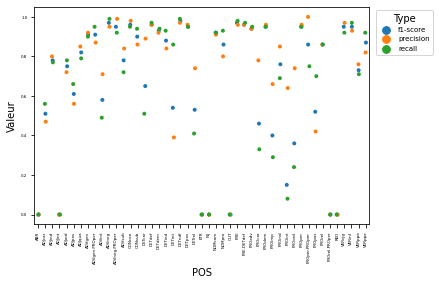

In [357]:
plt.xticks(rotation=90)
gfg = sns.stripplot(data = df_tidyM, x="level_0", y="val", hue="level_2", jitter=True, size=4)

gfg.legend(fontsize=7,bbox_to_anchor= (1.2,1),title="Type")

plt.rc('xtick', labelsize=4) 
plt.rc('ytick', labelsize=4) 

plt.xlabel('POS')
plt.ylabel('Valeur')
plt.savefig('visualisations/scatterplots/tidy/POSClassification.png', dpi=300, transparent=False,bbox_inches='tight') 